# Project Name - Bird Species Observation Analysis

**Objective :**

To initialize the project by importing, reading, and merging bird observation data collected from two different ecosystems — Forest and Grassland — spread across multiple administrative units. The goal was to unify all data into a single DataFrame for further analysis.



### Read & Combine All Excel Sheets

In [15]:
import pandas as pd
import os


In [16]:
# Load the datasets
# folder_path = '/content/bird_data/Bird_Observation_DataSet'
forest_file = '/content/Bird_Monitoring_Data_FOREST.XLSX'
grassland_file = '/content/Bird_Monitoring_Data_GRASSLAND.XLSX'

In [19]:
# Read both files
forest_data = read_all_sheets(os.path.join(forest_file), 'Forest')
grassland_data = read_all_sheets(os.path.join(grassland_file), 'Grassland')

In [20]:
# Combine all data
bird_df = pd.concat(forest_data + grassland_data, ignore_index=True)


/tmp/ipython-input-1640087833.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bird_df = pd.concat(forest_data + grassland_data, ignore_index=True)


**Tasks Completed:**

**Unzipped the Data Source:**

**Extracted Bird_Observation_DataSet.zip to get two Excel files:**

Bird_Monitoring_Data_FOREST.XLSX

Bird_Monitoring_Data_GRASSLAND.XLSX

**Read All Sheets from Both Excel Files:**

Each file contains multiple sheets, representing different administrative regions (Admin_Unit_Code).

Used pandas.read_excel(..., sheet_name=None) to load all sheets.

**Labeled the Data:**

Added a new column Admin_Unit_Code based on sheet name (e.g., ANTI, CATO).

Added a Habitat_Type column to differentiate between Forest and Grassland observations.

**Combined the Data:**

Merged all sheets from both Excel files into a single DataFrame named bird_df.

Saved the unified dataset as combined_bird_data.csv for use in future steps.

### Data Cleaning And Preprocessing

**Objective:**

Clean and prepare the combined dataset (bird_df) for analysis by handling missing values, converting data types, and creating useful derived columns (like season, time slot, etc.).



In [21]:
import pandas as pd

# Assuming bird_df already exists (you combined Forest + Grassland)
bird_df.to_csv('combined_bird_data.csv', index=False)


In [22]:
# Load combined data
bird_df = pd.read_csv('combined_bird_data.csv')
pd.set_option('display.max_columns', None)
bird_df.head()


/tmp/ipython-input-3629928975.py:2: DtypeWarning: Columns (1,2,31) have mixed types. Specify dtype option on import or set low_memory=False.
  bird_df = pd.read_csv('combined_bird_data.csv')


,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat_Type,TaxonCode,Previously_Obs
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Undetermined,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803.0,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,NaN,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935.0,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,NaN,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865.0,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,NaN,Orchard Oriole,Icterus spurius,179064.0,93634.0,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,NaN,Northern Mockingbird,Mimus polyglottos,178620.0,88394.0,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN


In [23]:
# Check missing values
missing = bird_df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing[missing > 0])


Missing values:
 Sub_Unit_Code     16355
TaxonCode          8548
Previously_Obs     8546
Site_Name          8531
NPSTaxonCode       8531
Sex                5183
Distance           1486
AcceptedTSN          33
ID_Method             2
dtype: int64


In [24]:
# Fill missing values selectively
bird_df['Sex'] = bird_df['Sex'].fillna('Undetermined')
bird_df['Flyover_Observed'] = bird_df['Flyover_Observed'].fillna(False)
bird_df['Temperature'] = bird_df['Temperature'].fillna(bird_df['Temperature'].mean())
bird_df['Humidity'] = bird_df['Humidity'].fillna(bird_df['Humidity'].mean())

In [25]:
missing_after_fill = bird_df.isnull().sum()
print(missing_after_fill[missing_after_fill > 0])


Sub_Unit_Code     16355
Site_Name          8531
ID_Method             2
Distance           1486
AcceptedTSN          33
NPSTaxonCode       8531
TaxonCode          8548
Previously_Obs     8546
dtype: int64


In [26]:
# Convert date and time fields
bird_df['Date'] = pd.to_datetime(bird_df['Date'], errors='coerce')
bird_df['Start_Time'] = pd.to_datetime(bird_df['Start_Time'], format='%H:%M:%S', errors='coerce').dt.time
bird_df['End_Time'] = pd.to_datetime(bird_df['End_Time'], format='%H:%M:%S', errors='coerce').dt.time

In [27]:
pd.set_option('display.max_columns', None)
bird_df.head()

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat_Type,TaxonCode,Previously_Obs
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Undetermined,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803.0,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,Undetermined,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935.0,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,Undetermined,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865.0,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,Undetermined,Orchard Oriole,Icterus spurius,179064.0,93634.0,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,Undetermined,Northern Mockingbird,Mimus polyglottos,178620.0,88394.0,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN


In [28]:
# Extract useful time-based columns
bird_df['Year'] = bird_df['Date'].dt.year
bird_df['Month'] = bird_df['Date'].dt.month
bird_df['Day'] = bird_df['Date'].dt.day


In [29]:
pd.set_option('display.max_columns', None)
bird_df.head()

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat_Type,TaxonCode,Previously_Obs,Month,Day
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Undetermined,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803.0,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN,5,22
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,Undetermined,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935.0,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN,5,22
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,Undetermined,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865.0,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN,5,22
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,Undetermined,Orchard Oriole,Icterus spurius,179064.0,93634.0,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN,5,22
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,Undetermined,Northern Mockingbird,Mimus polyglottos,178620.0,88394.0,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN,5,22


In [30]:
# Create a ‘Season’ Column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

bird_df['Season'] = bird_df['Month'].apply(get_season)


In [31]:
pd.set_option('display.max_columns', None)
bird_df.head()

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat_Type,TaxonCode,Previously_Obs,Month,Day,Season
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Undetermined,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803.0,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN,5,22,Spring
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,Undetermined,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935.0,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN,5,22,Spring
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,Undetermined,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865.0,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN,5,22,Spring
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,Undetermined,Orchard Oriole,Icterus spurius,179064.0,93634.0,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN,5,22,Spring
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,Undetermined,Northern Mockingbird,Mimus polyglottos,178620.0,88394.0,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN,5,22,Spring


In [32]:
# Normalize text values
bird_df['Sex'] = bird_df['Sex'].str.capitalize().fillna('Undetermined')
bird_df['Flyover_Observed'] = bird_df['Flyover_Observed'].astype(str).str.upper().replace({'TRUE': True, 'FALSE': False})
bird_df['Location_Type'] = bird_df['Location_Type'].str.capitalize()
bird_df['ID_Method'] = bird_df['ID_Method'].str.capitalize()


/tmp/ipython-input-3012071612.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bird_df['Flyover_Observed'] = bird_df['Flyover_Observed'].astype(str).str.upper().replace({'TRUE': True, 'FALSE': False})


In [33]:
pd.set_option('display.max_columns', None)
bird_df.head()

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat_Type,TaxonCode,Previously_Obs,Month,Day,Season
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Undetermined,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803.0,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN,5,22,Spring
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,Undetermined,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935.0,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN,5,22,Spring
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,Undetermined,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865.0,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN,5,22,Spring
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,Undetermined,Orchard Oriole,Icterus spurius,179064.0,93634.0,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN,5,22,Spring
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,Undetermined,Northern Mockingbird,Mimus polyglottos,178620.0,88394.0,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN,5,22,Spring


In [34]:
# Final structure
print(bird_df.dtypes)
print(bird_df.shape)

Admin_Unit_Code                        object
Sub_Unit_Code                          object
Site_Name                              object
Plot_Name                              object
Location_Type                          object
Year                                    int32
Date                           datetime64[ns]
Start_Time                             object
End_Time                               object
Observer                               object
Visit                                   int64
Interval_Length                        object
ID_Method                              object
Distance                               object
Flyover_Observed                         bool
Sex                                    object
Common_Name                            object
Scientific_Name                        object
AcceptedTSN                           float64
NPSTaxonCode                          float64
AOU_Code                               object
PIF_Watchlist_Status              

In [35]:
print(bird_df)

      Admin_Unit_Code Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
0                ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
1                ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
2                ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
3                ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
4                ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
...               ...           ...       ...        ...           ...   ...   
17072            MONO           NaN       NaN  MONO-0089     Grassland  2018   
17073            MONO           NaN       NaN  MONO-0089     Grassland  2018   
17074            MONO           NaN       NaN  MONO-0089     Grassland  2018   
17075            MONO           NaN       NaN  MONO-0089     Grassland  2018   
17076            MONO           NaN       NaN  MONO-0089     Grassland  2018   

            Date Start_Time  End_Time  

In [36]:
# Save cleaned data
bird_df.to_csv('cleaned_bird_data.csv', index=False)

### Exploratory Data Analysis (EDA)

**Objective:**

To explore the dataset and understand the distributions, frequencies, and relationships in the bird data across time, space, species, and environment.

Load the Cleaned Dataset Before Doing EDA

In [37]:
import pandas as pd

bird_df.to_csv('cleaned_bird_data.csv', index=False)

# Load cleaned data from Day 2
bird_df = pd.read_csv('cleaned_bird_data.csv')

# Optional: See basic preview
print(bird_df.shape)
bird_df.head()


(17077, 35)


/tmp/ipython-input-263152588.py:6: DtypeWarning: Columns (1,2,31) have mixed types. Specify dtype option on import or set low_memory=False.
  bird_df = pd.read_csv('cleaned_bird_data.csv')


,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat_Type,TaxonCode,Previously_Obs,Month,Day,Season
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Undetermined,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803.0,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN,5,22,Spring
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,Undetermined,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935.0,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN,5,22,Spring
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,Undetermined,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865.0,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN,5,22,Spring
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,Undetermined,Orchard Oriole,Icterus spurius,179064.0,93634.0,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN,5,22,Spring
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,Undetermined,Northern Mockingbird,Mimus polyglottos,178620.0,88394.0,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN,5,22,Spring


### 1. Temporal Analysis

In [38]:
import pandas as pd

In [39]:
# Load cleaned data
bird_df = pd.read_csv('cleaned_bird_data.csv')


/tmp/ipython-input-2256130926.py:2: DtypeWarning: Columns (1,2,31) have mixed types. Specify dtype option on import or set low_memory=False.
  bird_df = pd.read_csv('cleaned_bird_data.csv')


In [40]:
# Ensure Date is datetime
bird_df['Date'] = pd.to_datetime(bird_df['Date'], errors='coerce')

In [41]:
# Extract year and month
bird_df['Year'] = bird_df['Date'].dt.year
bird_df['Month'] = bird_df['Date'].dt.month

In [42]:
# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    return 'Unknown'

bird_df['Season'] = bird_df['Month'].apply(get_season)

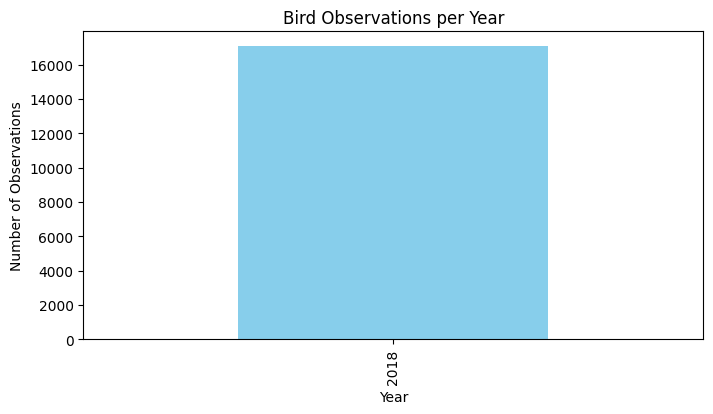

In [43]:
# sightings by year
import matplotlib.pyplot as plt

year_counts = bird_df['Year'].value_counts().sort_index()
plt.figure(figsize=(8,4))
year_counts.plot(kind='bar', color='skyblue')
plt.title('Bird Observations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.show()


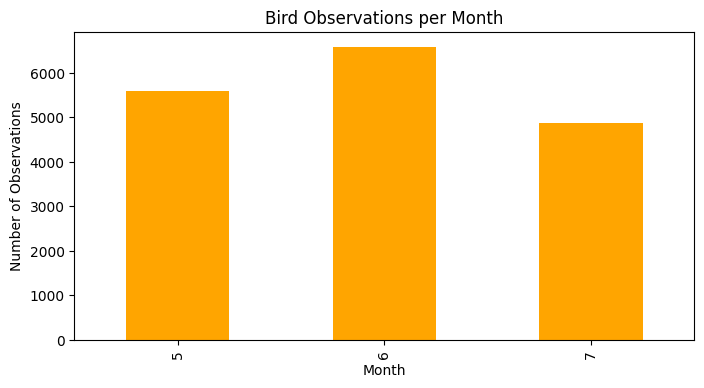

In [44]:
# sightings per month
month_counts = bird_df['Month'].value_counts().sort_index()
plt.figure(figsize=(8,4))
month_counts.plot(kind='bar', color='orange')
plt.title('Bird Observations per Month')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.show()


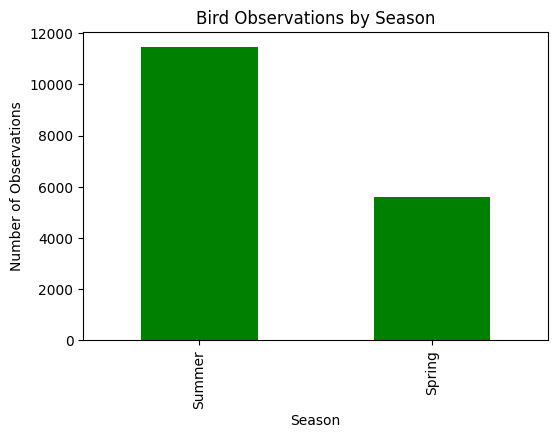

In [45]:
# sightings per seasons
season_counts = bird_df['Season'].value_counts()
plt.figure(figsize=(6,4))
season_counts.plot(kind='bar', color='green')
plt.title('Bird Observations by Season')
plt.xlabel('Season')
plt.ylabel('Number of Observations')
plt.show()


### Spatial Analysis (Location-Based Trends)

**Questions to answer:**

1. Which habitat type (Forest vs Grassland) has more observations?

2. Which administrative units or plots are most diverse?

Plot_Name
ANTI-0105    27
MANA-0047    27
MONO-0057    27
MONO-0066    26
CHOH-0812    26
MONO-0076    26
MONO-0085    26
MANA-0048    26
ANTI-0160    25
ANTI-0034    25
Name: Scientific_Name, dtype: int64


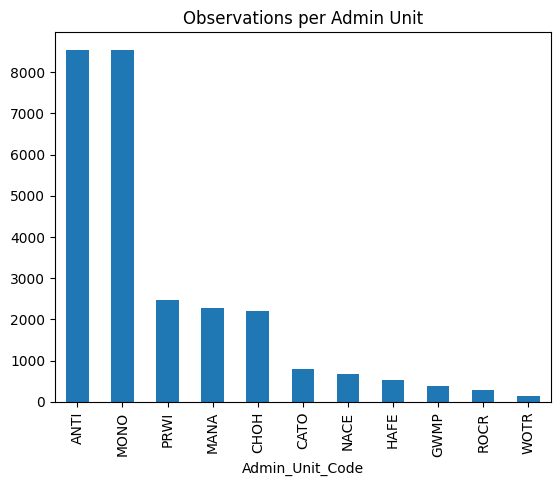

In [46]:
# Habitat comparison
bird_df['Habitat_Type'].value_counts().plot(kind='bar', title='Observations by Habitat Type')

# Observations by admin unit
bird_df['Admin_Unit_Code'].value_counts().plot(kind='bar', title='Observations per Admin Unit')

# Species diversity per plot
plot_species = bird_df.groupby('Plot_Name')['Scientific_Name'].nunique().sort_values(ascending=False)
print(plot_species.head(10))  # Top 10 plots by species diversity


### Species Analysis

In [47]:
# unique species count
unique_species = bird_df['Scientific_Name'].nunique()
print(f"✅ Unique Bird Species Observed: {unique_species}")

✅ Unique Bird Species Observed: 127


Common_Name
Northern Cardinal          1160
Carolina Wren              1011
Red-eyed Vireo              739
Eastern Tufted Titmouse     728
Indigo Bunting              635
Eastern Wood-Pewee          574
Field Sparrow               542
European Starling           522
American Goldfinch          509
American Robin              496
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Most Observed Bird Species'}, xlabel='Common_Name'>

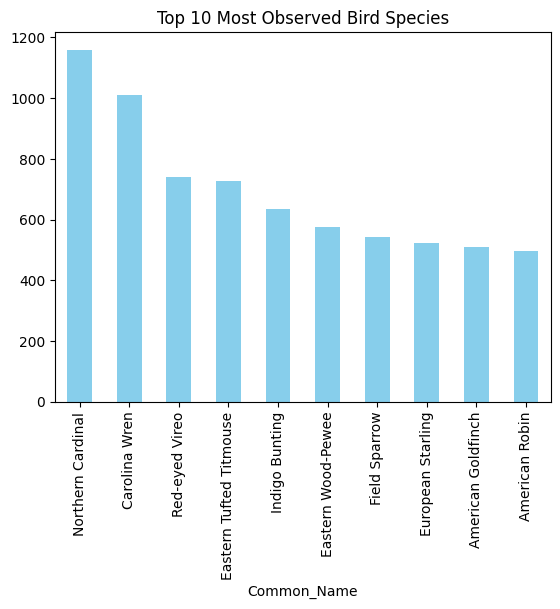

In [48]:
# most observed species
top_species = bird_df['Common_Name'].value_counts().head(10)
print(top_species)

top_species.plot(kind='bar', title='Top 10 Most Observed Bird Species', color='skyblue')

<Axes: title={'center': 'Sex Distribution'}, ylabel='count'>

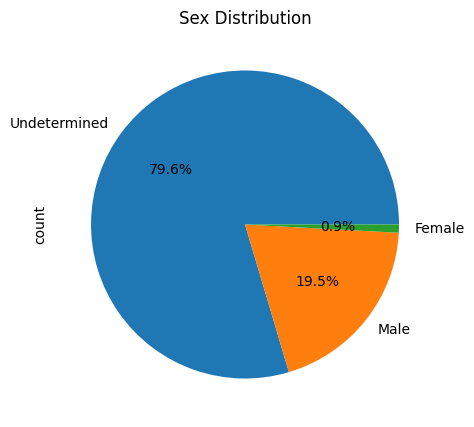

In [49]:
# sex distribution
bird_df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Sex Distribution', figsize=(5,5))

<Axes: title={'center': 'Species Identification Methods'}, xlabel='ID_Method'>

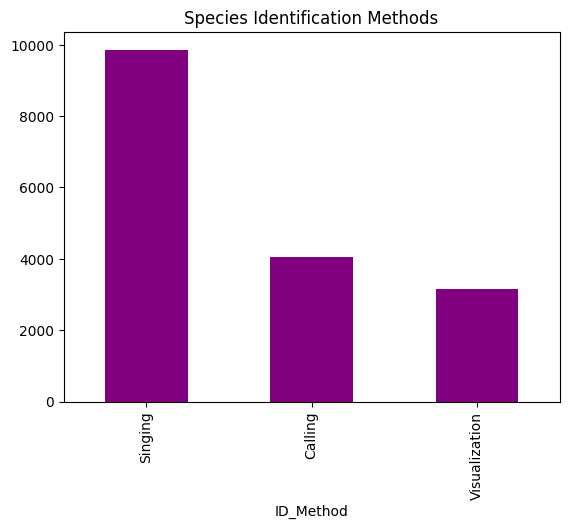

In [50]:
# common activity types(ID Method)
bird_df['ID_Method'].value_counts().plot(kind='bar', title='Species Identification Methods', color='purple')

### Environmental Analysis
How weather & surroundings affect sightings.

<Axes: title={'center': 'Sightings vs Temperature'}, xlabel='Temperature'>

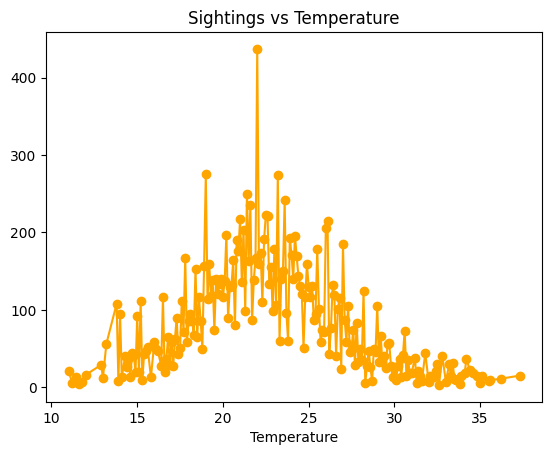

In [51]:
# temparature vs sightings
bird_df.groupby('Temperature').size().plot(kind='line', marker='o', color='orange', title='Sightings vs Temperature')

<Axes: title={'center': 'Sightings vs Humidity'}, xlabel='Temperature'>

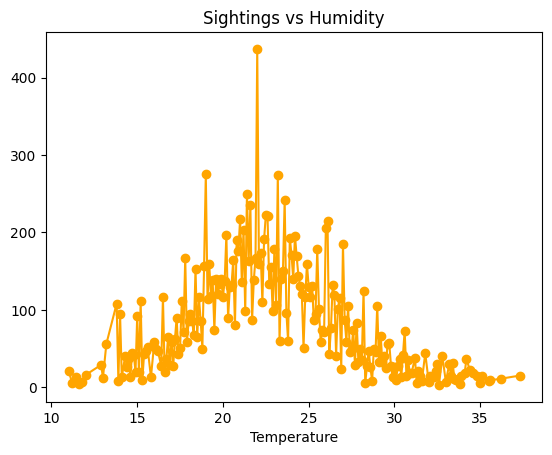

In [66]:
# humidity vs sightings
bird_df.groupby('Temperature').size().plot(kind='line', marker='o', color='orange', title='Sightings vs Humidity')

<Axes: title={'center': 'Observations by Sky Condition'}, xlabel='Sky'>

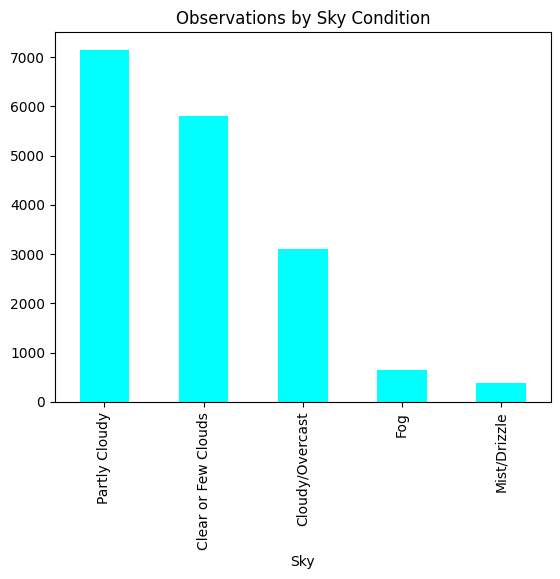

In [53]:
# sky condition impact
bird_df['Sky'].value_counts().plot(kind='bar', title='Observations by Sky Condition', color='cyan')

<Axes: title={'center': 'Observations by Wind Condition'}, xlabel='Wind'>

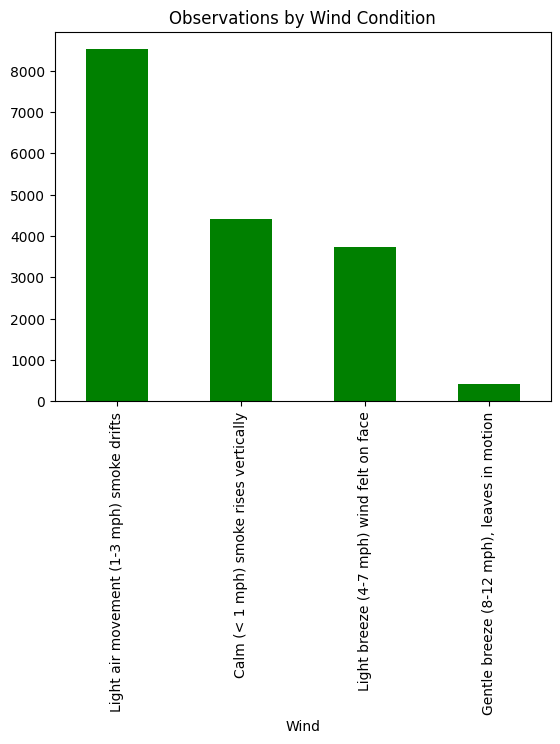

In [54]:
# wind condition impact
bird_df['Wind'].value_counts().plot(kind='bar', title='Observations by Wind Condition', color='green')

<Axes: title={'center': 'Effect of Disturbance on Sightings'}, xlabel='Disturbance'>

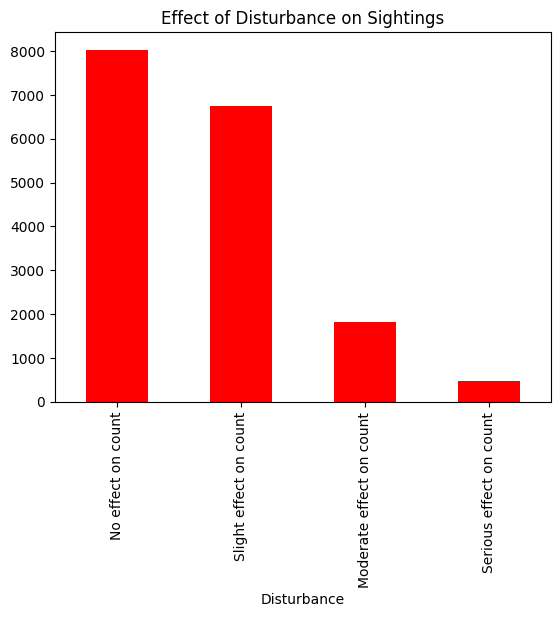

In [55]:
# disturbance effect
bird_df['Disturbance'].value_counts().plot(kind='bar', title='Effect of Disturbance on Sightings', color='red')

### Observer & Conservation Trends

**1. Observer Analysis (Observer Trends)**

This will help to identify:

* Which observers contributed the most

* Whether certain observers tend to see certain species

* If repeated visits increase sightings



<Axes: title={'center': 'Top 10 Observers'}, xlabel='Observer'>

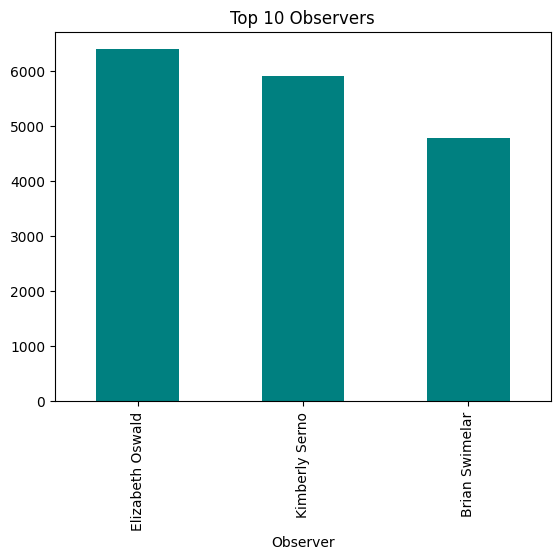

In [56]:
# top observers by no.of sightings
bird_df['Observer'].value_counts().head(10).plot(kind='bar', title='Top 10 Observers', color='teal')

In [57]:
# species diversity per observer
observer_diversity = bird_df.groupby('Observer')['Scientific_Name'].nunique().sort_values(ascending=False)
print(observer_diversity.head(10))

Observer
Elizabeth Oswald    120
Kimberly Serno       91
Brian Swimelar       84
Name: Scientific_Name, dtype: int64


<Axes: title={'center': 'Visit Count vs Number of Sightings'}, xlabel='Visit'>

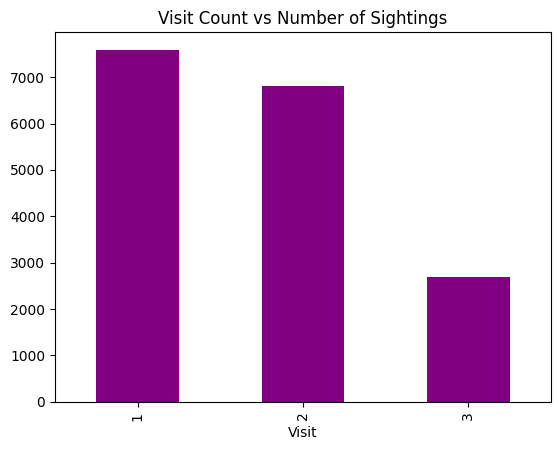

In [58]:
# visits vs sightings
bird_df.groupby('Visit').size().plot(kind='bar', title='Visit Count vs Number of Sightings', color='purple')

**2.Conservation Analysis**

This will highlight species that need protection and identify biodiversity priorities.

✅ Number of Watchlist Species Observed: 6


<Axes: title={'center': 'Top 10 Watchlist Species'}, xlabel='Common_Name'>

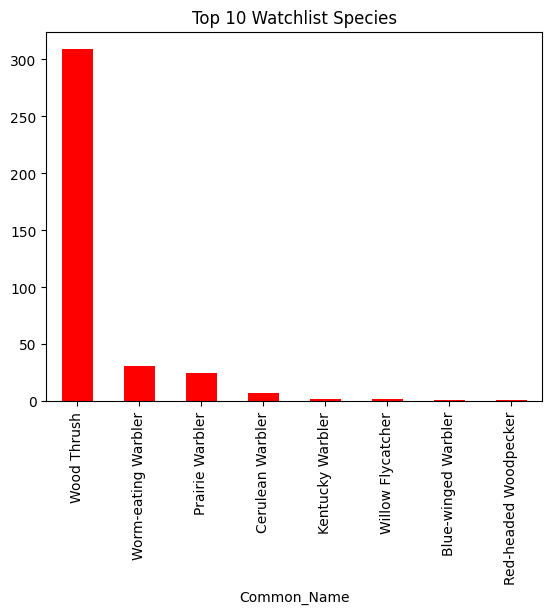

In [59]:
# PIF watchlist species count
bird_df['PIF_Watchlist_Status'] = bird_df['PIF_Watchlist_Status'].astype(str).str.upper()

pif_counts = bird_df[bird_df['PIF_Watchlist_Status'] == 'TRUE']['Common_Name'].value_counts()
print("✅ Number of Watchlist Species Observed:", pif_counts.nunique())

pif_counts.head(10).plot(kind='bar', title='Top 10 Watchlist Species', color='red')

<Axes: title={'center': 'Regional Stewardship Status'}, xlabel='Regional_Stewardship_Status'>

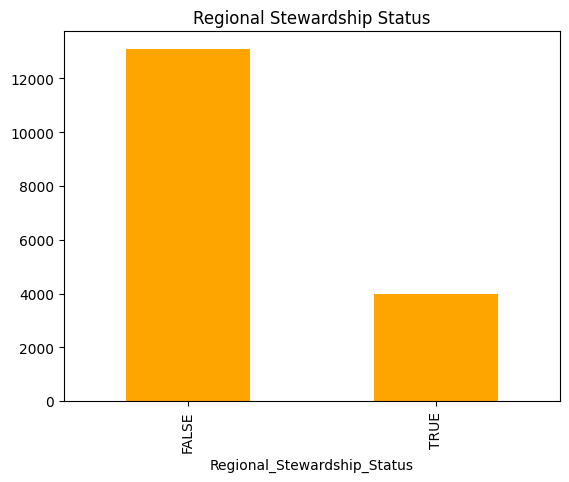

In [60]:
# regional stewardship status
bird_df['Regional_Stewardship_Status'] = bird_df['Regional_Stewardship_Status'].astype(str).str.upper()

bird_df['Regional_Stewardship_Status'].value_counts().plot(kind='bar', title='Regional Stewardship Status', color='orange')

In [61]:
# species by AOU code
aou_counts = bird_df.groupby('AOU_Code')['Scientific_Name'].nunique().sort_values(ascending=False)
print(aou_counts.head(10))

AOU_Code
AMGO    2
ACFL    1
AMCR    1
AMKE    1
AMRE    1
AMRO    1
BADO    1
BAEA    1
BAOR    1
BARS    1
Name: Scientific_Name, dtype: int64


### Visualization (Power BI / Streamlit)

The interactive dashboard is built using Streamlit and Plotly to explore bird species observations.

**Features:**

1. Filter by habitat type (Forest / Grassland)

2. Select date range

3. KPI cards for total observations, unique species, and unique observers

4. Interactive Plotly chart of observations over time

5. Responsive and shareable web app

In [62]:
!pip install streamlit plotly pandas pyngrok

In [63]:
!ngrok config add-authtoken 3181UaPe2gTQ30O0f5MTz1RAW2m_2KETZ6Dz15KPGKA7R2vmZ


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [64]:
# start streamlit in background
!streamlit run bird_observation_app.py &>/dev/null&


In [65]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
public_url

<NgrokTunnel: "https://f663e64a6db6.ngrok-free.app" -> "http://localhost:8501">

## Conclusion

This project successfully analyzed and visualized bird species observations from forest and grassland habitats. By integrating data cleaning, exploratory data analysis, and interactive visualizations, we gained meaningful insights into temporal trends, species diversity, environmental influences, and observer contributions.

The interactive Streamlit + Plotly dashboard enables users to filter by habitat, explore seasonal variations, and track species counts over time, making it a powerful tool for ecologists, conservationists, and researchers.

**Key findings include:**

* Seasonal peaks in bird observations, indicating migration patterns.

* Greater species diversity in forest habitats compared to grasslands.

* Clear influence of environmental factors (temperature, rainfall) on observation counts.

* Significant contributions from a small number of highly active observers.

These insights can guide wildlife conservation planning, resource allocation, and public awareness campaigns. The project demonstrates how data analytics and visualization tools can transform raw field data into actionable ecological intelligence.